In [725]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

Загружаем данные и изучаем их.

In [726]:
df = pd.read_csv('ebw_data.csv')

In [727]:
df

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


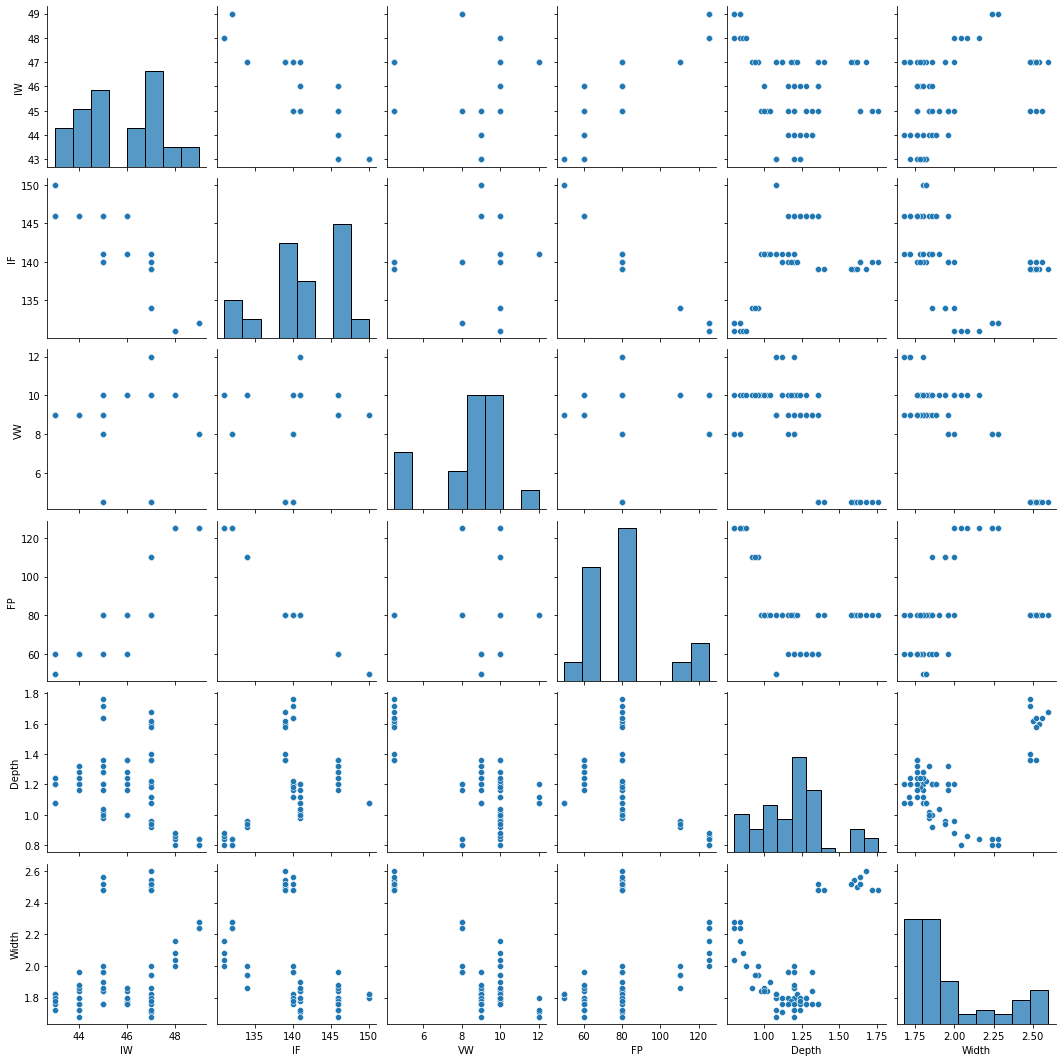

In [729]:
sns.pairplot(df)

Создаем тренеровочный и тестовый наборы данных.

In [730]:
target_columns = ['Depth', 'Width']
df_y = df[target_columns]
df_X = df.drop(columns=target_columns)

In [731]:
scaler = MinMaxScaler()
df_X = scaler.fit_transform(df_X)

In [732]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.33)

Создадим 4 модели: 

1. Нейронная сеть.

2. Случайный лес.

3. Линейная регрессия.

4. Метод опорных векторов.

Оценивать качество модели будем по сумме среднеквадротичных отклонений оценки длинны и шырены шва.


Будем складывать полученные ошибки в переменную `scores`

In [733]:
scores = {}

In [734]:
def fit_model(model, scores, name='linear_regression'):
    model_D = model
    model_W = model 

    model_D.fit(X_train, y_train['Depth'])
    preds_D = model_D.predict(X_test)
    loss_D = mean_squared_error(y_test['Depth'], preds_D)

    model_W.fit(X_train, y_train['Width'])
    preds_W = model_W.predict(X_test)
    loss_W = mean_squared_error(y_test['Width'], preds_W)
    
    scores[name] = loss_D + loss_W

    return model_D, model_W

In [735]:
fit_model(LinearRegression(), scores, name='Линейная регрессия')
fit_model(MLPRegressor(validation_fraction=0), scores, name='Нейронная сеть')
fit_model(SVR(), scores, name='Метод опорных векторов')
fit_model(RandomForestRegressor(), scores, name='Случайный лес')

/Users/lebedevmatvey/miniforge3/envs/p38main/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lebedevmatvey/miniforge3/envs/p38main/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(RandomForestRegressor(), RandomForestRegressor())

In [736]:
scores = dict(sorted(scores.items(), key=lambda item: item[1]))
print(scores)

{'Случайный лес': 0.0057696475310431376, 'Метод опорных векторов': 0.01049301563683916, 'Линейная регрессия': 0.013726099921562734, 'Нейронная сеть': 0.08589264825445028}


<BarContainer object of 4 artists>

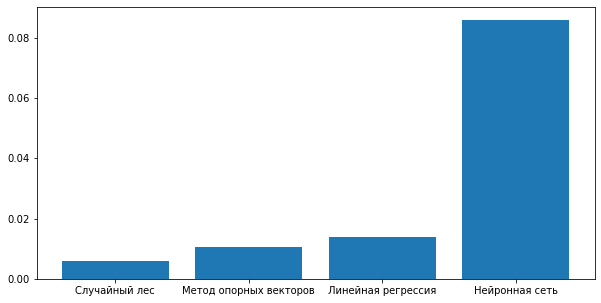

In [737]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(scores.keys(), scores.values())

Вывод: наилучшим алгоритмом для этой задачи будет случайный лес.

Обучим наилучшую модель на всем датасете.

In [738]:
model_D = RandomForestRegressor()
model_W = RandomForestRegressor()

model_D.fit(df_X, df_y['Depth'])
model_W.fit(df_X, df_y['Width'])

RandomForestRegressor()

Сохраним модели и скейлер для приложения.

In [739]:
dump(model_D, 'model_D.joblib') 
dump(model_W, 'model_W.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']